# Starling Task across subject behavioral data analysis healthy vs epileptic
Let's start the analysis based on Rhiannon's list [here](https://uofutah-my.sharepoint.com/:w:/g/personal/u1363968_umail_utah_edu/ESn4E7plikFIs1ZyLHy5YaUBZfn_td7fv2yCh6I5HsWL2g?e=MxDJfG&CID=0428038a-a81f-6b6f-5c00-c8f4ada097eb).

By: Niloufar Shahdoust

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FixedLocator
from scipy.stats import permutation_test


# ****************************************************************************

## reading all subjects data

In [2]:
folder_path = 'data_risk_added'
folder_path_epileptic = 'data_risk_added_epileptic'

output_folder = '3_output_healthy_vs_epileptic'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

if not os.path.exists(folder_path_epileptic):
    os.makedirs(folder_path_epileptic)

dataframes = []
dataframes_epileptic = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path)
        dataframes.append(df)



for file_name in os.listdir(folder_path_epileptic):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path_epileptic, file_name)
        df = pd.read_csv(file_path)
        dataframes_epileptic.append(df)
        

In [3]:
dataframes_epileptic[0]

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,is_within_IQR,risk
0,2390,uniform,756,win,2,7,3186,10.5,0,response,arrowdown,1,0,0,0.125
1,1262,uniform,874,win,9,4,1040,11,1,response,arrowup,1,0,0,0.000
2,1547,uniform,791,win,5,6,204,11.5,2,response,arrowdown,1,0,1,0.500
3,1627,uniform,828,win,9,1,872,12,3,response,arrowup,1,0,0,0.000
4,459,uniform,894,win,6,4,790,12.5,4,response,arrowup,1,0,0,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,514,high,847,win,8,7,429,85,134,response,arrowup,4,0,1,0.243
268,179,high,902,win,4,8,211,85.5,115,response,arrowdown,4,0,1,0.146
269,419,low,815,lose,8,9,353,85,81,response,arrowup,4,0,1,0.023
270,731,low,941,lose,3,1,212,84.5,59,response,arrowdown,4,0,1,0.447


# ****************************************************************************

## data preprocessing

1. sometimes block 2 is high and sometimes is low also sometimes block 3 is high and sometimes is low.
So I am adding another column to the dataframes called block_type and it could be: high, low, mix and uniform. 

In [4]:
for df in dataframes:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix

    

for df in dataframes_epileptic:
    df['block_type'] = None

    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix

In [5]:
for df in dataframes:
    df.drop(df[df['arrowRT'] == 'na'].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

for df in dataframes_epileptic:
    df.drop(df[df['arrowRT'] == 'na'].index, inplace=True)
    df.reset_index(drop=True, inplace=True)


## number of participants

In [6]:
n_participant = len(dataframes)
print(f"there are {n_participant} healthy participants.")


n_participant_epileptic = len(dataframes_epileptic)
print(f"there are {n_participant_epileptic}  epileptic participants.")

there are 38 healthy participants.
there are 9  epileptic participants.


### visualization prerequisites:
this order is very important in adding all the analysis block labels!

In [7]:
x_labels = ['uniform','low', 'high']
distributions_to_show = ['uniform','low', 'high']
colors = ['#808080',  '#ff7f0e', '#2ca02c']

# ****************************************************************************

<h2 style="color: green;">(0) looking at totalReward based on trials:</h2>

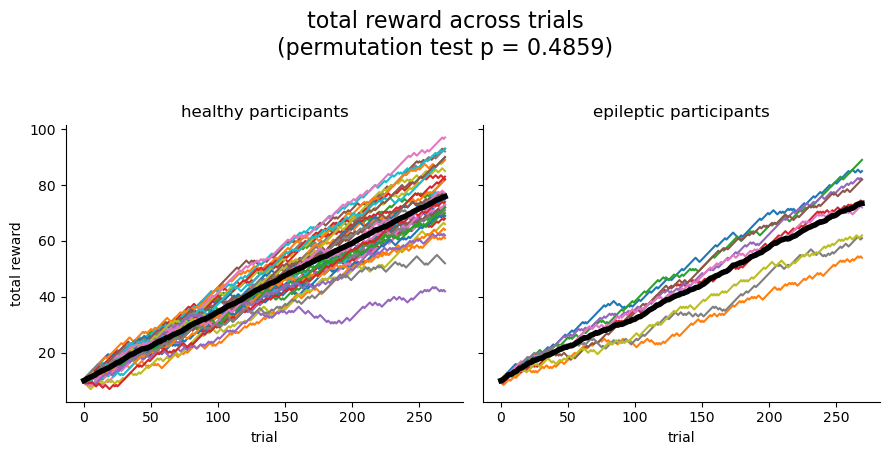

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharey=True)

# --- Healthy Participants ---
participant_totalReward_list = []

for df in dataframes:
    participant_totalReward = df[df['totalReward'] != "na"]['totalReward'].astype(float).tolist()
    participant_totalReward_list.append(participant_totalReward)
    axes[0].plot(participant_totalReward)

mean_total_reward = np.mean(participant_totalReward_list, axis=0)
axes[0].plot(mean_total_reward, color='black', linewidth=4, alpha=1)
axes[0].set_title("healthy participants")
axes[0].set_xlabel("trial")
axes[0].set_ylabel("total reward")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- Epileptic Participants ---
participant_totalReward_list_epileptic = []

for df in dataframes_epileptic:
    participant_totalReward = df[df['totalReward'] != "na"]['totalReward'].astype(float).tolist()
    participant_totalReward_list_epileptic.append(participant_totalReward)
    axes[1].plot(participant_totalReward)

mean_total_reward_epileptic = np.mean(participant_totalReward_list_epileptic, axis=0)
axes[1].plot(mean_total_reward_epileptic, color='black', linewidth=4, alpha=1)
axes[1].set_title("epileptic participants")
axes[1].set_xlabel("trial")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# --- Permutation Test ---
healthy_means = np.mean(participant_totalReward_list, axis=1)
epileptic_means = np.mean(participant_totalReward_list_epileptic, axis=1)
observed_diff = np.mean(healthy_means) - np.mean(epileptic_means)
combined = np.concatenate([healthy_means, epileptic_means])
n_healthy = len(healthy_means)
n_permutations = 10000
permuted_diffs = []

np.random.seed(0)
for _ in range(n_permutations):
    permuted = np.random.permutation(combined)
    group1 = permuted[:n_healthy] # making to different groups group1 healthy and goup2 epileptic
    group2 = permuted[n_healthy:]
    diff = np.mean(group1) - np.mean(group2)
    permuted_diffs.append(diff)

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))



main_title = "total reward across trials"
result_text = f"(permutation test p = {p_value:.4f})"
plt.suptitle(f"{main_title}\n{result_text}", fontsize=16)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.savefig(os.path.join(output_folder, "total_reward_comparison.pdf"), format="pdf", dpi=300, bbox_inches="tight")
plt.show()


<h2 style="color: green;">(1) Accuracy.</h2>

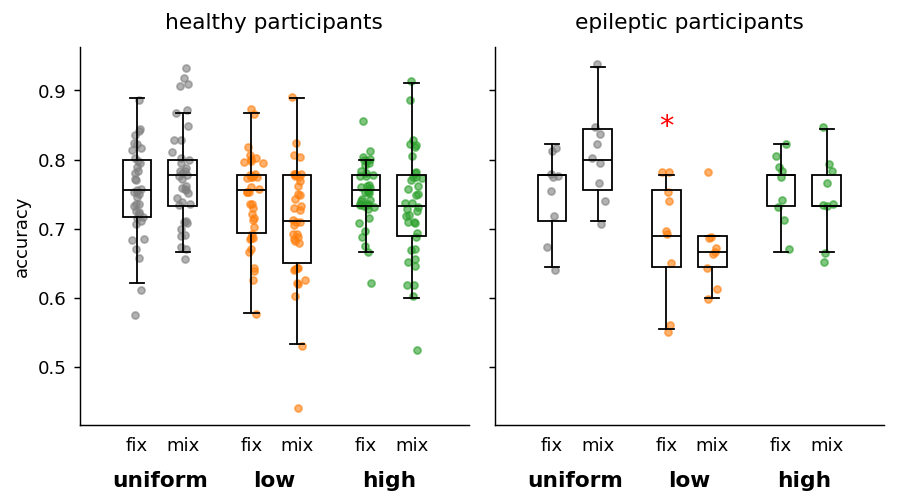

In [9]:
distributions_to_show = ['uniform', 'low', 'high']
colors = ['#808080', '#ff7f0e', '#2ca02c']

fig, axes = plt.subplots(1, 2, figsize=(7, 4), dpi=130, sharey=True)

# --- Healthy Participants ---
fixed_healthy_vals_all = {dist: [] for dist in distributions_to_show}
mixed_healthy_vals_all = {dist: [] for dist in distributions_to_show}

for df in dataframes:
    df['is_win'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)
    for dist in distributions_to_show:
        
        fixed_healthy_vals_all[dist].append(df[(df['block_type'] == 'fix') & (df['distribution'] == dist)]['is_win'].mean())
        mixed_healthy_vals_all[dist].append(df[(df['block_type'] == 'mix') & (df['distribution'] == dist)]['is_win'].mean())

# --- Epileptic Participants ---
fixed_epileptic_vals_all = {dist: [] for dist in distributions_to_show}
mixed_epileptic_vals_all = {dist: [] for dist in distributions_to_show}

for df in dataframes_epileptic:
    df['is_win'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)
    for dist in distributions_to_show:
        fixed_epileptic_vals_all[dist].append(df[(df['block_type'] == 'fix') & (df['distribution'] == dist)]['is_win'].mean())
        mixed_epileptic_vals_all[dist].append(df[(df['block_type'] == 'mix') & (df['distribution'] == dist)]['is_win'].mean())

# --- Plotting ---
for ax, fixed_vals_all, mixed_vals_all, title in zip(
    axes,
    [fixed_healthy_vals_all, fixed_epileptic_vals_all],
    [mixed_healthy_vals_all, mixed_epileptic_vals_all],
    ['healthy participants', 'epileptic participants']
):
    for i, dist in enumerate(distributions_to_show):
        # Fixed Box + Scatter
        ax.boxplot(
            fixed_vals_all[dist],
            positions=[i - 0.2],
            widths=0.25,
            patch_artist=True,
            boxprops=dict(facecolor='none', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            showfliers=False
        )

        jitter_x = np.random.normal(i - 0.2, 0.03, size=len(fixed_vals_all[dist]))
        jitter_y = np.array(fixed_vals_all[dist]) + np.random.normal(0, 0.005, size=len(fixed_vals_all[dist]))
        ax.scatter(jitter_x, jitter_y, s=15, color=colors[i], alpha=0.6)

        # Mixed Box + Scatter
        ax.boxplot(
            mixed_vals_all[dist],
            positions=[i + 0.2],
            widths=0.25,
            patch_artist=True,
            boxprops=dict(facecolor='none', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            showfliers=False
        )
        jitter_x = np.random.normal(i + 0.2, 0.03, size=len(mixed_vals_all[dist]))
        jitter_y = np.array(mixed_vals_all[dist]) + np.random.normal(0, 0.005, size=len(mixed_vals_all[dist]))
        ax.scatter(jitter_x, jitter_y, s=15, color=colors[i], alpha=0.6)

        # Annotations
        ax.text(i - 0.2, 0.4, 'fix', ha='center', va='top', fontsize=10)
        ax.text(i + 0.2, 0.4, 'mix', ha='center', va='top', fontsize=10)
        ax.text(i, 0.35, dist, ha='center', va='top', fontsize=12, fontweight='bold')

    ax.set_title(title, pad=10)
    ax.set_xticks([])
    if ax == axes[0]:
        ax.set_ylabel('accuracy')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# --- Permutation Tests and Significance Markers ---
p_values_fixed = []
p_values_mixed = []

for i, dist in enumerate(distributions_to_show):
    fixed_healthy = fixed_healthy_vals_all[dist]
    fixed_epileptic = fixed_epileptic_vals_all[dist]
    mixed_healthy = mixed_healthy_vals_all[dist]
    mixed_epileptic = mixed_epileptic_vals_all[dist]

    # Fixed permutation
    combined = np.concatenate([fixed_healthy, fixed_epileptic])
    n_healthy = len(fixed_healthy)
    observed_diff = np.mean(fixed_healthy) - np.mean(fixed_epileptic)
    perm_diffs = [
        np.mean(np.random.permutation(combined)[:n_healthy]) - np.mean(np.random.permutation(combined)[n_healthy:])
        for _ in range(10000)
    ]
    p_fixed = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    p_values_fixed.append(p_fixed)

    # Mixed permutation
    combined = np.concatenate([mixed_healthy, mixed_epileptic])
    observed_diff = np.mean(mixed_healthy) - np.mean(mixed_epileptic)
    perm_diffs = [
        np.mean(np.random.permutation(combined)[:n_healthy]) - np.mean(np.random.permutation(combined)[n_healthy:])
        for _ in range(10000)
    ]
    p_mixed = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
    p_values_mixed.append(p_mixed)

    # Significance markers (only epileptic)
    max_height = max(max(fixed_epileptic), max(mixed_epileptic))
    y_star = max_height + 0.05

    if p_fixed < 0.05:
        axes[1].text(i - 0.2, y_star, '*', color='red', ha='center', va='bottom', fontsize=16)
    if p_mixed < 0.05:
        axes[1].text(i + 0.2, y_star, '*', color='red', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "fixed_vs_mixed_accuracy.pdf"), format="pdf", dpi=300, bbox_inches="tight")
plt.show()


<h2 style="color: green;"> space RT</h2>

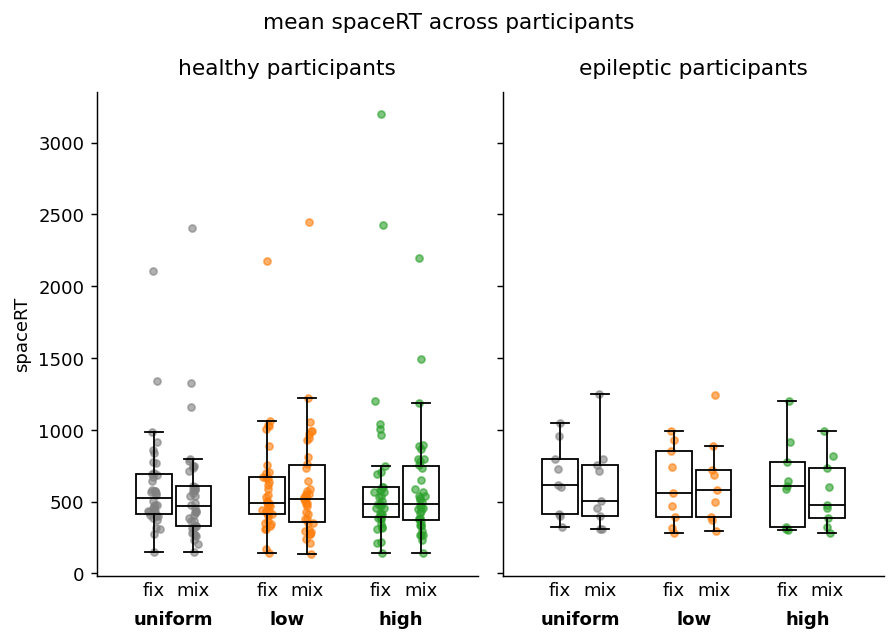

In [10]:
# --- shared settings ---
distributions_to_show = ['uniform', 'low', 'high']
colors = ['#808080', '#ff7f0e', '#2ca02c']
bar_width = 0.35
fig, axes = plt.subplots(1, 2, figsize=(7, 5), dpi=130, sharey=True)
x = np.arange(len(distributions_to_show))

# ---------- HEALTHY ----------
spaceRT_mixed_all_healthy, spaceRT_fixed_all_healthy = [], []

for df in dataframes:
    df_mixed = df[(df['block_type'] == 'mix') & (df['is_within_IQR'] == 1)]
    df_fix   = df[(df['block_type'] == 'fix') & (df['is_within_IQR'] == 1)]

    spaceRT_mixed_all_healthy.append(df_mixed.groupby('distribution')['spaceRT'].mean())
    spaceRT_fixed_all_healthy.append(df_fix.groupby('distribution')['spaceRT'].mean())

mixed_healthy = pd.concat(spaceRT_mixed_all_healthy, axis=1).mean(axis=1).rename('spaceRT_mean')
mixed_healthy_sem = pd.concat(spaceRT_mixed_all_healthy, axis=1).sem(axis=1).rename('spaceRT_sem')
mixed_healthy = pd.concat([mixed_healthy, mixed_healthy_sem], axis=1).reset_index()

fixed_healthy = pd.concat(spaceRT_fixed_all_healthy, axis=1).mean(axis=1).rename('spaceRT_mean')
fixed_healthy_sem = pd.concat(spaceRT_fixed_all_healthy, axis=1).sem(axis=1).rename('spaceRT_sem')
fixed_healthy = pd.concat([fixed_healthy, fixed_healthy_sem], axis=1).reset_index()

# box/points – healthy
for i, dist in enumerate(distributions_to_show):
    vals_fix  = [s.get(dist, np.nan) for s in spaceRT_fixed_all_healthy]
    vals_mix  = [s.get(dist, np.nan) for s in spaceRT_mixed_all_healthy]

    vals_fix  = [v for v in vals_fix if not np.isnan(v)]
    vals_mix  = [v for v in vals_mix if not np.isnan(v)]

    axes[0].boxplot(vals_fix, positions=[x[i]-bar_width/2], widths=bar_width*0.9,
                    patch_artist=True, boxprops=dict(facecolor='none', color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)
    axes[0].scatter(np.random.normal(x[i]-bar_width/2, .02, len(vals_fix)), vals_fix,
                    color=colors[i], s=15, alpha=.6)

    axes[0].boxplot(vals_mix, positions=[x[i]+bar_width/2], widths=bar_width*0.9,
                    patch_artist=True, boxprops=dict(facecolor='none', color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)
    axes[0].scatter(np.random.normal(x[i]+bar_width/2, .02, len(vals_mix)), vals_mix,
                    color=colors[i], s=15, alpha=.6)

axes[0].set_title('healthy participants', pad=10)
axes[0].set_ylabel('spaceRT')
axes[0].set_xticks([])

# ---------- EPILEPTIC ----------
spaceRT_mixed_all_epi, spaceRT_fixed_all_epi = [], []

for df in dataframes_epileptic:                            # <-- fixed
    df_mixed = df[(df['block_type'] == 'mix') & (df['is_within_IQR'] == 1)]
    df_fix   = df[(df['block_type'] == 'fix') & (df['is_within_IQR'] == 1)]

    spaceRT_mixed_all_epi.append(df_mixed.groupby('distribution')['spaceRT'].mean())
    spaceRT_fixed_all_epi.append(df_fix.groupby('distribution')['spaceRT'].mean())

mixed_epi = pd.concat(spaceRT_mixed_all_epi, axis=1).mean(axis=1).rename('spaceRT_mean')
mixed_epi_sem = pd.concat(spaceRT_mixed_all_epi, axis=1).sem(axis=1).rename('spaceRT_sem')
mixed_epi = pd.concat([mixed_epi, mixed_epi_sem], axis=1).reset_index()

fixed_epi = pd.concat(spaceRT_fixed_all_epi, axis=1).mean(axis=1).rename('spaceRT_mean')
fixed_epi_sem = pd.concat(spaceRT_fixed_all_epi, axis=1).sem(axis=1).rename('spaceRT_sem')
fixed_epi = pd.concat([fixed_epi, fixed_epi_sem], axis=1).reset_index()

# box/points – epileptic
for i, dist in enumerate(distributions_to_show):
    vals_fix  = [s.get(dist, np.nan) for s in spaceRT_fixed_all_epi]
    vals_mix  = [s.get(dist, np.nan) for s in spaceRT_mixed_all_epi]

    vals_fix  = [v for v in vals_fix if not np.isnan(v)]
    vals_mix  = [v for v in vals_mix if not np.isnan(v)]

    axes[1].boxplot(vals_fix, positions=[x[i]-bar_width/2], widths=bar_width*0.9,
                    patch_artist=True, boxprops=dict(facecolor='none', color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)
    axes[1].scatter(np.random.normal(x[i]-bar_width/2, .02, len(vals_fix)), vals_fix,
                    color=colors[i], s=15, alpha=.6)

    axes[1].boxplot(vals_mix, positions=[x[i]+bar_width/2], widths=bar_width*0.9,
                    patch_artist=True, boxprops=dict(facecolor='none', color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)
    axes[1].scatter(np.random.normal(x[i]+bar_width/2, .02, len(vals_mix)), vals_mix,
                    color=colors[i], s=15, alpha=.6)

axes[1].set_title('epileptic participants', pad=10)
axes[1].set_xticks([])

# ---------- PERMUTATION TESTS ----------
p_values_fixed, p_values_mixed = [], []

for i, dist in enumerate(distributions_to_show):

    # helper: collect per-participant means, drop NaNs
    def get_vals(lst):
        return np.array([d.get(dist, np.nan) for d in lst], dtype=float)[~np.isnan(
              [d.get(dist, np.nan) for d in lst])]

    h_fix,  e_fix  = get_vals(spaceRT_fixed_all_healthy),  get_vals(spaceRT_fixed_all_epi)
    h_mix,  e_mix  = get_vals(spaceRT_mixed_all_healthy),  get_vals(spaceRT_mixed_all_epi)

    def perm_p(a, b, reps=10000):
        combined = np.concatenate([a, b])
        n_a = len(a)
        obs = np.mean(a) - np.mean(b)
        diffs = [
            (lambda s: np.mean(s[:n_a]) - np.mean(s[n_a:]))(np.random.permutation(combined))
            for _ in range(reps)
        ]
        return np.mean(np.abs(diffs) >= np.abs(obs))

    p_fixed = perm_p(h_fix, e_fix);   p_values_fixed.append(p_fixed)
    p_mix  = perm_p(h_mix, e_mix);    p_values_mixed.append(p_mix)

    # star location
    y_star = max(fixed_epi.loc[fixed_epi['distribution']==dist, 'spaceRT_mean'].values[0] +
                 fixed_epi.loc[fixed_epi['distribution']==dist, 'spaceRT_sem'].values[0],
                 mixed_epi.loc[mixed_epi['distribution']==dist, 'spaceRT_mean'].values[0] +
                 mixed_epi.loc[mixed_epi['distribution']==dist, 'spaceRT_sem'].values[0]) + 0.05

    if p_fixed < .05:
        axes[1].text(x[i]-bar_width/2, y_star, '*', color='red', ha='center', va='top', fontsize=16)
    if p_mix  < .05:
        axes[1].text(x[i]+bar_width/2, y_star, '*', color='red', ha='center', va='top', fontsize=16)

# ---------- cosmetics ----------
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for i, dist in enumerate(distributions_to_show):
        ax.text(x[i]-bar_width/2, -0.04, 'fix', ha='center', transform=ax.get_xaxis_transform())
        ax.text(x[i]+bar_width/2, -0.04, 'mix', ha='center', transform=ax.get_xaxis_transform())
        ax.text(x[i], -0.1, dist, ha='center', fontweight='bold', transform=ax.get_xaxis_transform())

plt.suptitle("mean spaceRT across participants")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "fixed_vs_mixed_distribution_spaceRT.pdf"),
            format="pdf", dpi=300, bbox_inches="tight")
plt.show()


<h2 style="color: green;"> arrow RT</h2>

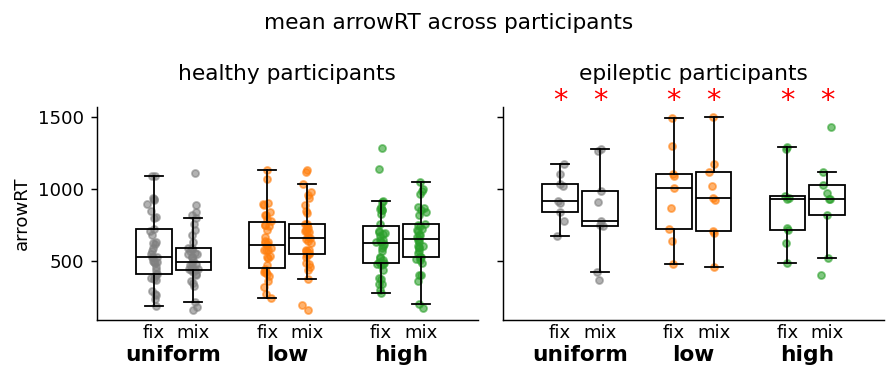

In [11]:
distributions_to_show = ['uniform', 'low', 'high']
colors = ['#808080', '#ff7f0e', '#2ca02c']
bar_width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(7, 3), dpi=130, sharey=True)

# ── Healthy participants ──────────────────────────────────────────────────────
arrowRT_mixed_all_healthy, fixed_healthy_all = [], []

for df in dataframes:
    df['arrowRT'] = pd.to_numeric(df['arrowRT'], errors='coerce')

    df_mixed = df[df['block_type'] == 'mix']
    arrowRT_mixed_all_healthy.append(
        df_mixed.groupby('distribution')['arrowRT'].mean().reset_index()
    )

    df_fixed = df[df['block_type'] == 'fix']
    fixed_healthy_all.append(
        df_fixed.groupby('distribution')['arrowRT'].mean().reset_index()
    )

combined_mixed_healthy = pd.concat(arrowRT_mixed_all_healthy)
mixed_healthy = (
    combined_mixed_healthy.groupby('distribution')['arrowRT']
    .agg(['mean', 'sem'])
    .reset_index()
    .rename(columns={'mean': 'arrowRT_mean', 'sem': 'arrowRT_sem'})
)
mixed_healthy['distribution'] = pd.Categorical(
    mixed_healthy['distribution'], categories=distributions_to_show, ordered=True
)
mixed_healthy = mixed_healthy.sort_values('distribution')

combined_fixed_healthy = pd.concat(fixed_healthy_all)
fixed_healthy = (
    combined_fixed_healthy.groupby('distribution')['arrowRT']
    .agg(['mean', 'sem'])
    .reset_index()
    .rename(columns={'mean': 'arrowRT_mean', 'sem': 'arrowRT_sem'})
)
fixed_healthy = (
    fixed_healthy.set_index('distribution')
    .reindex(distributions_to_show)
    .reset_index()
)

x = np.arange(len(distributions_to_show))

for i, dist in enumerate(distributions_to_show):
    # Fixed
    fixed_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'fix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce'
        ).mean() for df in dataframes
    ]
    axes[0].boxplot(
        fixed_vals,
        positions=[x[i] - bar_width / 2],
        widths=bar_width * 0.9,
        patch_artist=True,
        boxprops=dict(facecolor='none', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        showfliers=False
    )
    jitter_x = np.random.normal(x[i] - bar_width / 2, 0.02, size=len(fixed_vals))
    axes[0].scatter(jitter_x, fixed_vals, s=15, alpha=0.6, color=colors[i])

    # Mixed
    mixed_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'mix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce'
        ).mean() for df in dataframes
    ]
    axes[0].boxplot(
        mixed_vals,
        positions=[x[i] + bar_width / 2],
        widths=bar_width * 0.9,
        patch_artist=True,
        boxprops=dict(facecolor='none', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        showfliers=False
    )
    jitter_x = np.random.normal(x[i] + bar_width / 2, 0.02, size=len(mixed_vals))
    axes[0].scatter(jitter_x, mixed_vals, s=15, alpha=0.6, color=colors[i])

axes[0].set_title('healthy participants', pad=15)
axes[0].set_ylabel('arrowRT')
axes[0].set_xticks([])

# ── Epileptic participants ────────────────────────────────────────────────────
arrowRT_mixed_all_epileptic, fixed_epileptic_all = [], []

for df in dataframes_epileptic:
    df['arrowRT'] = pd.to_numeric(df['arrowRT'], errors='coerce')

    df_mixed = df[df['block_type'] == 'mix']
    arrowRT_mixed_all_epileptic.append(
        df_mixed.groupby('distribution')['arrowRT'].mean().reset_index()
    )

    df_fixed = df[df['block_type'] == 'fix']
    fixed_epileptic_all.append(
        df_fixed.groupby('distribution')['arrowRT'].mean().reset_index()
    )

combined_mixed_epileptic = pd.concat(arrowRT_mixed_all_epileptic)
mixed_epileptic = (
    combined_mixed_epileptic.groupby('distribution')['arrowRT']
    .agg(['mean', 'sem'])
    .reset_index()
    .rename(columns={'mean': 'arrowRT_mean', 'sem': 'arrowRT_sem'})
)
mixed_epileptic['distribution'] = pd.Categorical(
    mixed_epileptic['distribution'], categories=distributions_to_show, ordered=True
)
mixed_epileptic = mixed_epileptic.sort_values('distribution')

combined_fixed_epileptic = pd.concat(fixed_epileptic_all)
fixed_epileptic = (
    combined_fixed_epileptic.groupby('distribution')['arrowRT']
    .agg(['mean', 'sem'])
    .reset_index()
    .rename(columns={'mean': 'arrowRT_mean', 'sem': 'arrowRT_sem'})
)
fixed_epileptic = (
    fixed_epileptic.set_index('distribution')
    .reindex(distributions_to_show)
    .reset_index()
)

for i, dist in enumerate(distributions_to_show):
    # Fixed
    fixed_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'fix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce'
        ).mean() for df in dataframes_epileptic
    ]
    axes[1].boxplot(
        fixed_vals,
        positions=[x[i] - bar_width / 2],
        widths=bar_width * 0.9,
        patch_artist=True,
        boxprops=dict(facecolor='none', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        showfliers=False
    )
    jitter_x = np.random.normal(x[i] - bar_width / 2, 0.02, size=len(fixed_vals))
    axes[1].scatter(jitter_x, fixed_vals, s=15, alpha=0.6, color=colors[i])

    # Mixed
    mixed_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'mix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce'
        ).mean() for df in dataframes_epileptic
    ]
    axes[1].boxplot(
        mixed_vals,
        positions=[x[i] + bar_width / 2],
        widths=bar_width * 0.9,
        patch_artist=True,
        boxprops=dict(facecolor='none', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        showfliers=False
    )
    jitter_x = np.random.normal(x[i] + bar_width / 2, 0.02, size=len(mixed_vals))
    axes[1].scatter(jitter_x, mixed_vals, s=15, alpha=0.6, color=colors[i])

axes[1].set_title('epileptic participants', pad=15)
axes[1].set_xticks([])

# ── Labels under bars ─────────────────────────────────────────────────────────
for ax in axes:
    for i, dist in enumerate(distributions_to_show):
        ax.text(
            x[i] - bar_width / 2,
            -0.02,
            'fix',
            ha='center',
            va='top',
            fontsize=10,
            transform=ax.get_xaxis_transform(),
        )
        ax.text(
            x[i] + bar_width / 2,
            -0.02,
            'mix',
            ha='center',
            va='top',
            fontsize=10,
            transform=ax.get_xaxis_transform(),
        )
        ax.text(
            x[i],
            -0.12,
            dist,
            ha='center',
            va='top',
            fontsize=12,
            fontweight='bold',
            transform=ax.get_xaxis_transform(),
        )

# ── Permutation tests & significance markers ─────────────────────────────────
rng = np.random.default_rng()

for i, dist in enumerate(distributions_to_show):
    # Fixed
    fixed_healthy_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'fix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce',
        ).mean()
        for df in dataframes
    ]
    fixed_epileptic_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'fix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce',
        ).mean()
        for df in dataframes_epileptic
    ]

    combined = np.concatenate([fixed_healthy_vals, fixed_epileptic_vals])
    n_healthy = len(fixed_healthy_vals)
    observed_diff = np.nanmean(fixed_healthy_vals) - np.nanmean(fixed_epileptic_vals)

    perm_diffs = [
        np.nanmean(rng.permutation(combined)[:n_healthy])
        - np.nanmean(rng.permutation(combined)[n_healthy:])
        for _ in range(10000)
    ]
    p_fixed = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

    # Mixed
    mixed_healthy_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'mix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce',
        ).mean()
        for df in dataframes
    ]
    mixed_epileptic_vals = [
        pd.to_numeric(
            df.loc[(df['block_type'] == 'mix') & (df['distribution'] == dist), 'arrowRT'],
            errors='coerce',
        ).mean()
        for df in dataframes_epileptic
    ]

    combined = np.concatenate([mixed_healthy_vals, mixed_epileptic_vals])
    observed_diff = np.nanmean(mixed_healthy_vals) - np.nanmean(mixed_epileptic_vals)

    perm_diffs = [
        np.nanmean(rng.permutation(combined)[:n_healthy])
        - np.nanmean(rng.permutation(combined)[n_healthy:])
        for _ in range(10000)
    ]
    p_mixed = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

    # Star positions
    height_fix = 1500
    height_mix = 1500

    if p_fixed < 0.05:
        axes[1].text(
            x[i] - bar_width / 2,
            height_fix + 10,
            '*',
            color='red',
            ha='center',
            va='bottom',
            fontsize=16,
        )
    if p_mixed < 0.05:
        axes[1].text(
            x[i] + bar_width / 2,
            height_mix + 10,
            '*',
            color='red',
            ha='center',
            va='bottom',
            fontsize=16,
        )

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle('mean arrowRT across participants')
plt.tight_layout()

plt.savefig(
    os.path.join(output_folder, 'fixed_vs_mixed_distribution_arrowRT.pdf'),
    format='pdf',
    dpi=300,
    bbox_inches='tight',
)
plt.show()


<h2 style="color: green;">(2_1) arrowRT for different card number </h2>

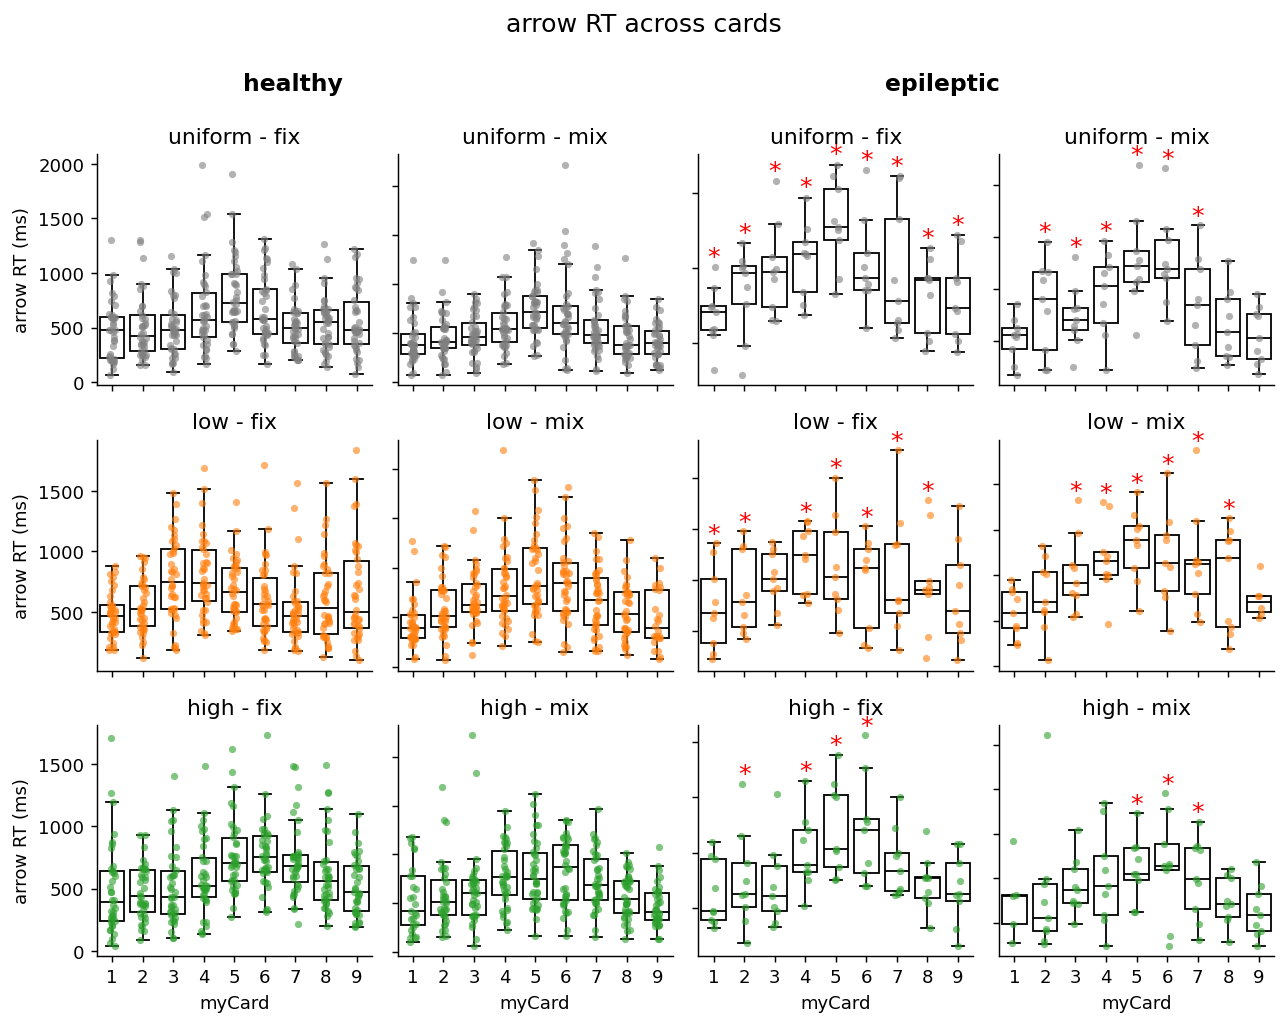

In [12]:

# Define color scheme
distributions = ['uniform', 'low', 'high']
colors = {'uniform': '#808080', 'low': '#ff7f0e', 'high': '#2ca02c'}

# --- Function to compute combined arrowRT ---
def compute_combined_arrowRT(dataframes):
    arrowRT_by_card_block = []
    for df in dataframes:
        df['arrowRT'] = pd.to_numeric(df['arrowRT'], errors='coerce')
        df['myCard'] = df['myCard'].astype(int)
        arrow_rt_means = df.groupby(['myCard', 'distribution', 'block_type'])['arrowRT'].mean().reset_index()
        arrowRT_by_card_block.append(arrow_rt_means)
    return pd.concat(arrowRT_by_card_block)

# --- Process both healthy and epileptic data ---
combined_arrowRT_healthy = compute_combined_arrowRT(dataframes)
combined_arrowRT_epileptic = compute_combined_arrowRT(dataframes_epileptic)

# --- Run permutation tests ---
def run_permutation_test(group1, group2, num_rounds=10000):
    def statistic(x, y):
        return np.mean(x) - np.mean(y)
    res = permutation_test((group1, group2), statistic, permutation_type='independent', alternative='two-sided', n_resamples=num_rounds)
    return res.pvalue

perm_test_results = []

for dist in ['uniform', 'low', 'high']:
    for card in range(1, 10):
        for block_type in ['fix', 'mix']:
            healthy_vals = combined_arrowRT_healthy[
                (combined_arrowRT_healthy['distribution'] == dist) &
                (combined_arrowRT_healthy['block_type'] == block_type) &
                (combined_arrowRT_healthy['myCard'] == card)
            ]['arrowRT'].dropna()

            epileptic_vals = combined_arrowRT_epileptic[
                (combined_arrowRT_epileptic['distribution'] == dist) &
                (combined_arrowRT_epileptic['block_type'] == block_type) &
                (combined_arrowRT_epileptic['myCard'] == card)
            ]['arrowRT'].dropna()

            if len(healthy_vals) > 1 and len(epileptic_vals) > 1:
                p = run_permutation_test(healthy_vals.values, epileptic_vals.values)
                perm_test_results.append({
                    'distribution': dist,
                    'myCard': card,
                    'block_type': block_type,
                    'p_value': p
                })

perm_test_results = pd.DataFrame(perm_test_results)

# --- Create 3x4 grid for plotting ---
fig, axes = plt.subplots(3, 4, figsize=(10, 8), dpi=130)
fig.suptitle('arrow RT across cards', fontsize=14)
fig.text(0.23, 0.9, 'healthy', ha='center', va='bottom', fontsize=13, weight='bold')
fig.text(0.73, 0.9, 'epileptic', ha='center', va='bottom', fontsize=13, weight='bold')

for row_idx, dist in enumerate(distributions):
    for col_offset, (group_label, combined_arrowRT) in enumerate([
        ('fix', combined_arrowRT_healthy),
        ('mix', combined_arrowRT_healthy),
        ('fix', combined_arrowRT_epileptic),
        ('mix', combined_arrowRT_epileptic)
    ]):
        data = combined_arrowRT[
            (combined_arrowRT['distribution'] == dist) &
            (combined_arrowRT['block_type'] == group_label)
        ]

        ax = axes[row_idx, col_offset]
        sns.boxplot(
            data=data,
            x='myCard',
            y='arrowRT',
            ax=ax,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='')  
        )

        # Add scatter (strip) points
        sns.stripplot(
            data=data,
            x='myCard',
            y='arrowRT',
            ax=ax,
            color=colors[dist],
            size=4,
            jitter=True,
            alpha=0.6
        )

        ax.set_title(f'{dist} - {group_label}')

        # Axis labels
        if row_idx == 2:
            ax.set_xlabel('myCard')
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        if col_offset == 0:
            ax.set_ylabel('arrow RT (ms)')
        else:
            ax.set_ylabel('')
            ax.set_yticklabels([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        # Add red * on significant differences for epileptic plots only
        if col_offset >= 2:
            for tick, mycard in enumerate(sorted(data['myCard'].unique())):
                p_row = perm_test_results[
                    (perm_test_results['distribution'] == dist) &
                    (perm_test_results['block_type'] == group_label) &
                    (perm_test_results['myCard'] == mycard)
                ]
                if not p_row.empty and p_row['p_value'].values[0] < 0.05:
                    y_max = data[data['myCard'] == mycard]['arrowRT'].max()
                    ax.text(tick, y_max + 20, '*', color='red', fontsize=14, ha='center')


# --- Final layout and save ---
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig(os.path.join(output_folder, "arrow_up_down_for_cards.pdf"), format="pdf", dpi=300, bbox_inches="tight")

plt.show()


<h2 style="color: green;">(2_2) acc for different numbers in different block</h2>

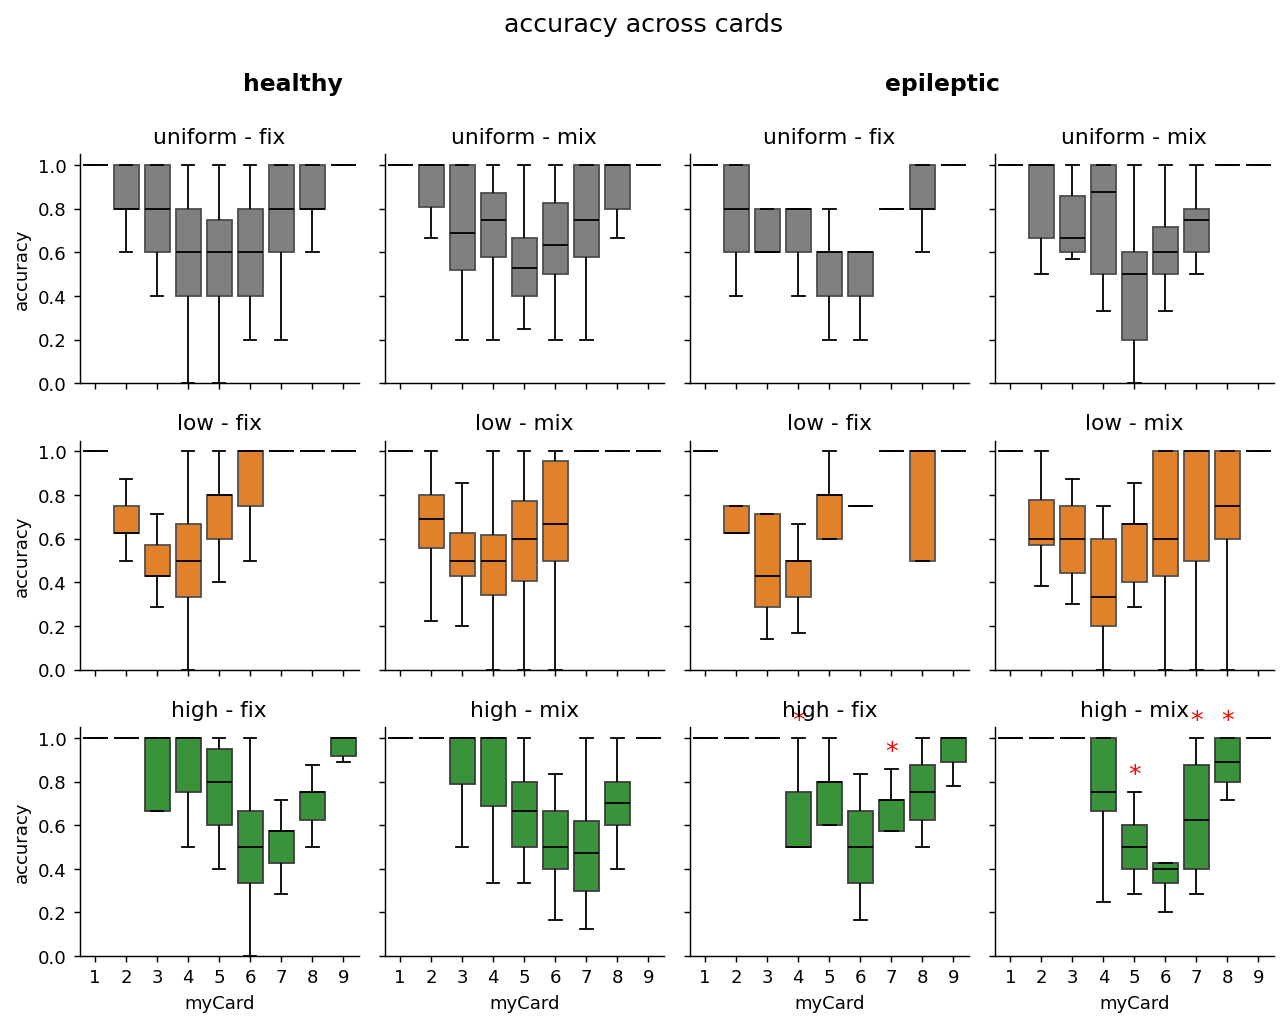

In [13]:
# Define color scheme
distributions = ['uniform', 'low', 'high']
colors = {'uniform': '#808080', 'low': '#ff7f0e', 'high': '#2ca02c'}

# --- Function to compute combined accuracy ---
def compute_combined_accuracy(dataframes):
    acc_by_card_block = []
    for df in dataframes:
        df['outcome'] = df['outcome'].astype(str)
        df['is_win'] = df['outcome'] == 'win'
        df['myCard'] = df['myCard'].astype(int)
        acc_means = df.groupby(['myCard', 'distribution', 'block_type'])['is_win'].mean().reset_index()
        acc_by_card_block.append(acc_means)
    return pd.concat(acc_by_card_block)

# --- Process both healthy and epileptic data ---
combined_acc_healthy = compute_combined_accuracy(dataframes)
combined_acc_epileptic = compute_combined_accuracy(dataframes_epileptic)

# --- Run permutation tests ---
def run_permutation_test(group1, group2, num_rounds=10000):
    def statistic(x, y):
        return np.mean(x) - np.mean(y)
    res = permutation_test((group1, group2), statistic, permutation_type='independent', alternative='two-sided', n_resamples=num_rounds)
    return res.pvalue

perm_test_results = []

for dist in ['uniform', 'low', 'high']:
    for card in range(1, 10):
        for block_type in ['fix', 'mix']:
            healthy_vals = combined_acc_healthy[
                (combined_acc_healthy['distribution'] == dist) &
                (combined_acc_healthy['block_type'] == block_type) &
                (combined_acc_healthy['myCard'] == card)
            ]['is_win'].dropna()

            epileptic_vals = combined_acc_epileptic[
                (combined_acc_epileptic['distribution'] == dist) &
                (combined_acc_epileptic['block_type'] == block_type) &
                (combined_acc_epileptic['myCard'] == card)
            ]['is_win'].dropna()

            if len(healthy_vals) > 1 and len(epileptic_vals) > 1:
                p = run_permutation_test(healthy_vals.values, epileptic_vals.values)
                perm_test_results.append({
                    'distribution': dist,
                    'myCard': card,
                    'block_type': block_type,
                    'p_value': p
                })

perm_test_results = pd.DataFrame(perm_test_results)

fig, axes = plt.subplots(3, 4, figsize=(10, 8), dpi=130)
fig.suptitle('accuracy across cards', fontsize=14)
fig.text(0.23, 0.9, 'healthy', ha='center', va='bottom', fontsize=13, weight='bold')
fig.text(0.73, 0.9, 'epileptic', ha='center', va='bottom', fontsize=13, weight='bold')

for row_idx, dist in enumerate(distributions):
    for col_offset, (group_label, combined_acc) in enumerate([
        ('fix', combined_acc_healthy),
        ('mix', combined_acc_healthy),
        ('fix', combined_acc_epileptic),
        ('mix', combined_acc_epileptic)
    ]):
        data = combined_acc[
            (combined_acc['distribution'] == dist) &
            (combined_acc['block_type'] == group_label)
        ]

        ax = axes[row_idx, col_offset]
        sns.boxplot(
            data=data,
            x='myCard',
            y='is_win',
            ax=ax,
            color=colors[dist],  # Use face color
            medianprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='')  # Hide outliers
        )

        ax.set_title(f'{dist} - {group_label}')

        # Axis labels
        if row_idx == 2:
            ax.set_xlabel('myCard')
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        if col_offset == 0:
            ax.set_ylabel('accuracy')
        else:
            ax.set_ylabel('')
            ax.set_yticklabels([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_ylim(0, 1.05)

        # Add red * on significant differences for epileptic plots only
        if col_offset >= 2:
            for tick, mycard in enumerate(sorted(data['myCard'].unique())):
                p_row = perm_test_results[
                    (perm_test_results['distribution'] == dist) &
                    (perm_test_results['block_type'] == group_label) &
                    (perm_test_results['myCard'] == mycard)
                ]
                if not p_row.empty and p_row['p_value'].values[0] < 0.05:
                    y_max = data[data['myCard'] == mycard]['is_win'].max()
                    ax.text(tick, y_max + 0.05, '*', color='red', fontsize=14, ha='center')

# --- Final layout and save ---
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig(os.path.join(output_folder, "accuracy_across_cards.pdf"), format="pdf", dpi=300, bbox_inches="tight")
plt.show()

<h2 style="color: green;">(3) Arrow Press</h2>

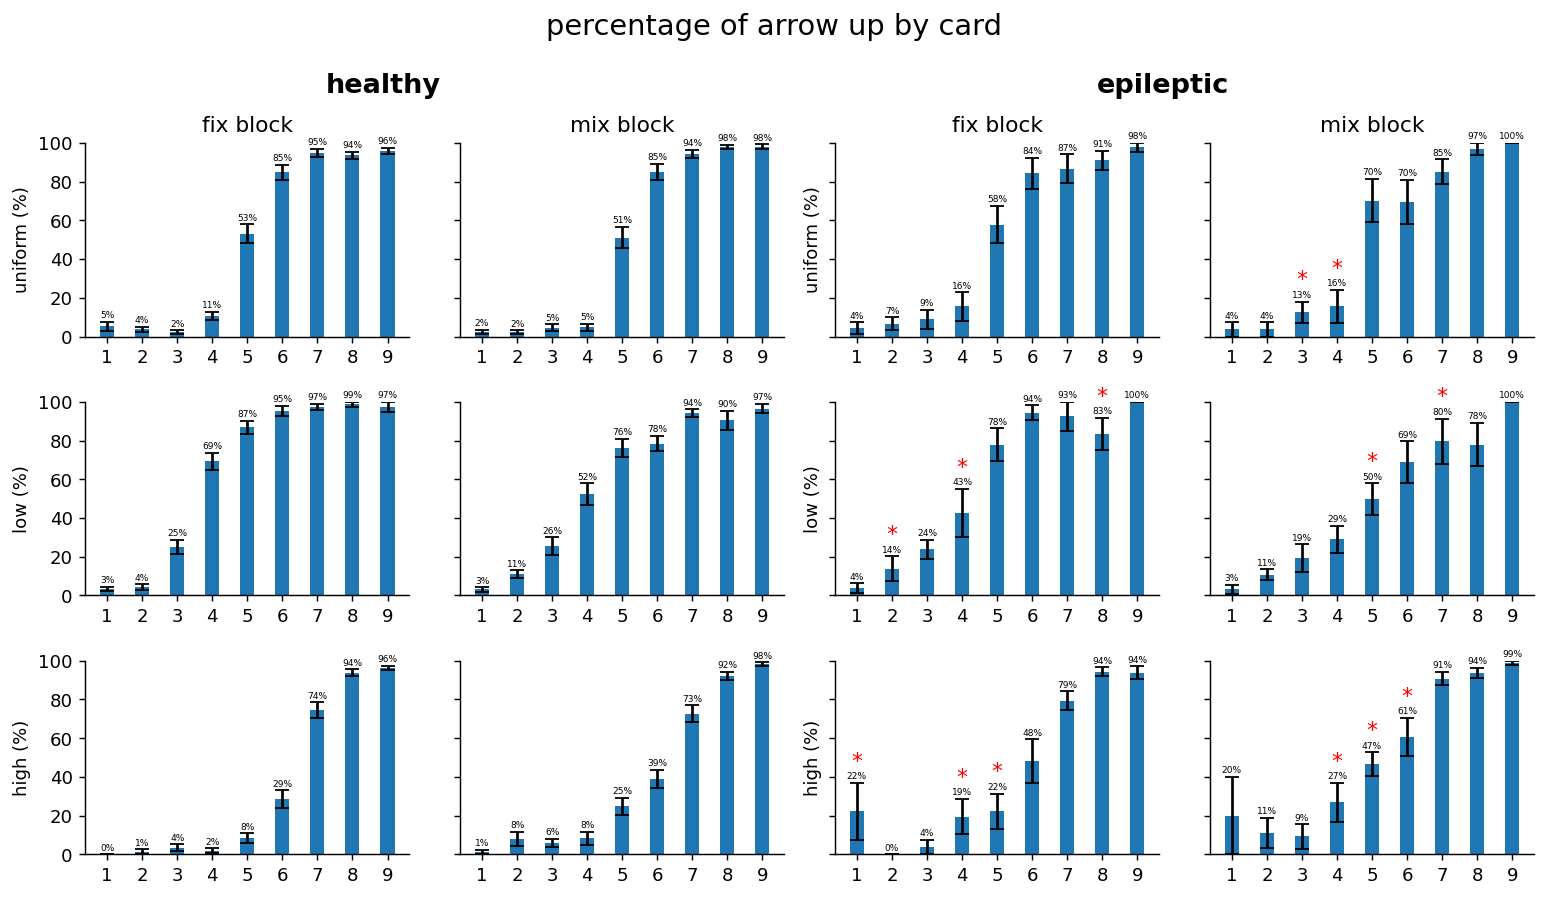

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# --- Parameters ---
distributions = ['uniform', 'low', 'high']
block_types = ['fix', 'mix']
colors = {'arrowup': '#1f77b4'}

# --- Compute percentages ---
def compute_percentages(dataframes, target_dist, target_block):
    group_results = []

    for df in dataframes:
        sub_df = df[(df['distribution'] == target_dist) & (df['block_type'] == target_block)].copy()
        sub_df['group'] = sub_df['myCard'].astype(str)

        group_counts = sub_df.groupby(['group', 'choice'], observed=True)['choice'].count().unstack(fill_value=0)
        group_totals = group_counts.sum(axis=1)
        group_percentages = (group_counts.T / group_totals).T * 100
        group_percentages['group'] = group_percentages.index
        group_results.append(group_percentages.reset_index(drop=True))

    if not group_results:
        return None, None, None, None

    combined_df = pd.concat(group_results)
    mean_df = combined_df.groupby('group', observed=True).mean().reset_index()
    sem_df = combined_df.groupby('group', observed=True).sem().reset_index()
    
    return mean_df, sem_df, combined_df, mean_df['group']

# --- Permutation test ---
def permutation_test(x, y, n_perm=10000):
    observed_diff = np.nanmean(x) - np.nanmean(y)
    combined = np.concatenate([x, y])
    count = 0

    for _ in range(n_perm):
        np.random.shuffle(combined)
        x_perm = combined[:len(x)]
        y_perm = combined[len(x):]
        diff_perm = np.nanmean(x_perm) - np.nanmean(y_perm)
        if abs(diff_perm) >= abs(observed_diff):
            count += 1

    return count / n_perm

# --- Plotting ---
fig, axes = plt.subplots(3, 4, figsize=(12, 7), dpi=130, sharey=True)
fig.suptitle('percentage of arrow up by card', fontsize=16)

for col_offset, (df_set, label) in enumerate([(dataframes, 'healthy'), (dataframes_epileptic, 'epileptic')]):
    for row_idx, dist in enumerate(distributions):
        for col_idx, block in enumerate(block_types):
            ax = axes[row_idx, col_idx + col_offset * 2]
            mean_df, sem_df, combined_df, groups = compute_percentages(df_set, dist, block)

            if mean_df is None:
                ax.axis('off')
                continue

            arrow_up = mean_df.get('arrowup', 0)
            sem_up = sem_df.get('arrowup', 0)

            x = np.arange(len(groups))
            bar_width = 0.4

            ax.bar(x, arrow_up, bar_width, color=colors['arrowup'], yerr=sem_up, capsize=4)

            for i, group in enumerate(groups):
                value = arrow_up[i]
                err = sem_up[i]
                ax.text(x[i], value + err + 1, f'{round(value)}%', ha='center', va='bottom', fontsize=5)

                # --- Only apply permutation test to epileptic bars ---
                if label == 'epileptic':
                    healthy_df = df_set if label == 'epileptic' else dataframes
                    epileptic_df = df_set if label == 'epileptic' else dataframes_epileptic

                    _, _, healthy_comb, _ = compute_percentages(dataframes, dist, block)
                    _, _, epileptic_comb, _ = compute_percentages(dataframes_epileptic, dist, block)

                    h_vals = healthy_comb[healthy_comb['group'] == group]['arrowup'].dropna().values
                    e_vals = epileptic_comb[epileptic_comb['group'] == group]['arrowup'].dropna().values

                    if len(h_vals) > 1 and len(e_vals) > 1:
                        pval = permutation_test(h_vals, e_vals)

                        if pval < 0.05:
                            ax.text(x[i], value + err + 6, '*', ha='center', va='bottom', fontsize=12, color='red')

            ax.set_xticks(x)
            ax.set_xticklabels(groups)
            ax.set_ylim(0, 100)

            if col_idx == 0:
                ax.set_ylabel(f'{dist} (%)')
            if row_idx == 0:
                ax.set_title(f'{block} block')

            for spine in ['top', 'right']:
                ax.spines[spine].set_visible(False)

# Add column labels
for i, label in zip([0.25, 0.75], ['healthy', 'epileptic']):
    fig.text(i, 0.9, label, ha='center', va='center', fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(os.path.join(output_folder, "arrow_up_percent_only.pdf"), format="pdf", dpi=300, bbox_inches="tight")
plt.show()


<h2 style="color: red;">add more analysis from invidual codes!! </h2>